In [1]:
# load packages
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'1.10.0'

# Load Data

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# normlize the data
train_x = train_x.astype("float32") / 255.0
test_x = test_x.astype("float32") / 255.0

In [4]:
# one-hot encode the labels
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

In [5]:
train_y[0], test_y[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [6]:
# reshape input image to 1-channel images form 3-channel images
w, h = 28, 28
train_x = train_x.reshape(train_x.shape[0], w*h)
test_x = test_x.reshape(test_x.shape[0], w*h)

In [7]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

# Perceptron Model

In [8]:
num_features = train_x.shape[1] # number of inputs
num_classes = train_y.shape[1] # number of classes in output
num_features, num_classes

(784, 10)

In [9]:
# placeholders for input
x = tf.placeholder(dtype=tf.float32, shape=(None, num_features), name="feature_x")
y = tf.placeholder(dtype=tf.float32, shape=(None, num_classes), name="target_y")

In [10]:
x, y

(<tf.Tensor 'feature_x:0' shape=(?, 784) dtype=float32>,
 <tf.Tensor 'target_y:0' shape=(?, 10) dtype=float32>)

In [11]:
# configure layer 1
l1_nodes = 10

w1 = tf.Variable(tf.random_normal(shape=(l1_nodes, num_features), mean=0.0, stddev=1.0, dtype=tf.float32, name="layer1_weights")) # weight
b1 = tf.Variable(tf.random_normal([l1_nodes], dtype=tf.float32, name="layer1_bias")) # bias

z1 = tf.matmul(x, tf.transpose(w1))

l1_output = tf.nn.relu(z1 + b1) # layer1 output

In [12]:
w1, b1, l1_output

(<tf.Variable 'Variable:0' shape=(10, 784) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>,
 <tf.Tensor 'Relu:0' shape=(?, 10) dtype=float32>)

In [13]:
# configure layer 2
l2_nodes = 10

w2 = tf.Variable(tf.random_normal(shape=(l2_nodes, l1_nodes), mean=0.0, stddev=1.0, dtype=tf.float32, name="layer2_weights"))
b2 = tf.Variable(tf.random_normal([l2_nodes], dtype=tf.float32, name="layer2_bias"))

z2 = tf.matmul(l1_output, tf.transpose(w2))

l2_output = tf.nn.relu(z2 + b2) # layer2 output

In [14]:
# output layer
output_weight = tf.Variable(tf.random_normal(shape=(num_classes, l2_nodes), mean=0.0, stddev=1.0, dtype=tf.float32, name="output_layer_weights"))
output_bias = tf.Variable(tf.random_normal([num_classes], dtype=tf.float32, name="output_layer_bias")) # bias

output_z = tf.matmul(l1_output, tf.transpose(output_weight))

output = tf.nn.softmax(output_z + output_bias) # softmax activation

In [15]:
output_weight, output_bias, output

(<tf.Variable 'Variable_4:0' shape=(10, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>)

In [16]:
# define loss function
loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(output + 1e-10))) # categorical cross entropy

In [17]:
trainer = tf.train.GradientDescentOptimizer(learning_rate = 0.0001).minimize(loss_function) # optimizer to minimize loss function

In [18]:
loss_list = list()
val_loss_list = list()

In [19]:
# run the model
epochs = 1000
step = 100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # write graph
    writer = tf.summary.FileWriter("tensorboard_graphs/vanilla_perceptron", sess.graph)
    
    # run epochs
    for i in range(epochs+1):
        j = 0
        # run batch operation
        while j in range(60000):
            sess.run(trainer, feed_dict={x:train_x[j:j+step], y:train_y[j:j+step]})
            j += step
        loss = sess.run(loss_function, feed_dict={x:train_x, y:train_y})
        val_loss = sess.run(loss_function, feed_dict={x:test_x, y:test_y})
        loss_list.append(loss)
        val_loss_list.append(val_loss)
        if i % 100 == 0:
            print("Step:", i, ":\t", "loss:", loss, "val_loss:", val_loss)
    
    writer.close()

Step: 0 :	 loss: 161161.97 val_loss: 26121.443
Step: 100 :	 loss: 32708.795 val_loss: 5228.236
Step: 200 :	 loss: 27351.91 val_loss: 4471.2485
Step: 300 :	 loss: 24699.252 val_loss: 4116.421
Step: 400 :	 loss: 23093.55 val_loss: 3875.726
Step: 500 :	 loss: 21935.08 val_loss: 3694.0264
Step: 600 :	 loss: 21007.895 val_loss: 3545.0928
Step: 700 :	 loss: 20274.586 val_loss: 3426.6707
Step: 800 :	 loss: 19671.396 val_loss: 3333.414
Step: 900 :	 loss: 19179.928 val_loss: 3262.2212
Step: 1000 :	 loss: 18767.268 val_loss: 3201.5908


# Visualize Model Performance

In [20]:
import matplotlib.pyplot as plt

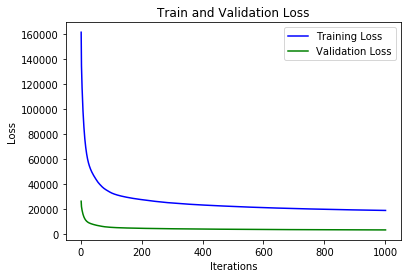

In [21]:
epochs = range(1, len(loss_list) + 1)

plt.plot(epochs, loss_list, "b", label="Training Loss", color="blue")
plt.plot(epochs, val_loss_list, "b", label="Validation Loss", color="green")

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Train and Validation Loss")

plt.show()